In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Drop the non-beneficial ID columns
application_df = application_df.drop(columns=['EIN'], axis=1)
application_df


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [ ]:
application_df.nunique()


NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [ ]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
replace_application = list(application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < 500].index)

# Replace in DataFrame
for app in replace_application:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [ ]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
print(classification_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [ ]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts_gt1 = classification_counts[classification_counts > 1]
print(classification_counts_gt1)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [ ]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 1000
classifications_to_replace = [cls for cls, count in classification_counts.items() if count < cutoff_value]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df)

In [ ]:

# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# (FIRST ATTEMPT)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

#Add droput layer1
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))



#Add droput layer2
#nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 80)                1568960   
                                                                 
 dropout_2 (Dropout)         (None, 80)                0         
                                                                 
 dense_9 (Dense)             (None, 30)                2430      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1571421 (5.99 MB)
Trainable params: 1571421 (5.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model (First Attempt)
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [ ]:
# Train the model
epochs=100
history=nn.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5079 - acc: 0.7546
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1759 - acc: 0.9326
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.1025 - acc: 0.9611
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0974 - acc: 0.9614
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0940 - acc: 0.9621
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0929 - acc: 0.9620
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0921 - acc: 0.9624
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0911 - acc: 0.9620
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0911 - acc: 0.9627
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.0899 - acc: 0.9635
Epoch 11/100
804/804 [=================

In [ ]:
# Evaluate the model using the test data(First Attempt)
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 [==============================] - 1s 3ms/step - loss: 0.6844 - acc: 0.5694
Loss: 0.6844422221183777, Accuracy: 0.5694460868835449


In [ ]:
# (SECOND ATTEMPT - ACCURACY 75%+)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

input_features_total = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

#Add droput layer1
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))



#Add droput layer2
#nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                1568960   
                                                                 
 dense_12 (Dense)            (None, 30)                2430      
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1571421 (5.99 MB)
Trainable params: 1571421 (5.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [ ]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 5s 4ms/step - loss: 0.7445 - accuracy: 0.7041
Epoch 2/200
804/804 [==============================] - 3s 4ms/step - loss: 0.6161 - accuracy: 0.9119
Epoch 3/200
804/804 [==============================] - 3s 4ms/step - loss: 0.2673 - accuracy: 0.9519
Epoch 4/200
804/804 [==============================] - 3s 4ms/step - loss: 2.3391 - accuracy: 0.8061
Epoch 5/200
804/804 [==============================] - 3s 4ms/step - loss: 4.4441 - accuracy: 0.6609
Epoch 6/200
804/804 [==============================] - 3s 4ms/step - loss: 4.3008 - accuracy: 0.7154
Epoch 7/200
804/804 [==============================] - 3s 4ms/step - loss: 4.2626 - accuracy: 0.7190
Epoch 8/200
804/804 [==============================] - 3s 4ms/step - loss: 4.2429 - accuracy: 0.7210
Epoch 9/200
804/804 [==============================] - 3s 4ms/step - loss: 4.2370 - accuracy: 0.7215
Epoch 10/200
804/804 [==============================] - 3s 4ms/step - loss: 4.2349 - accura

In [ ]:
history.history

{'loss': [0.5079082250595093,
  0.17586396634578705,
  0.10248668491840363,
  0.09739759564399719,
  0.0940166562795639,
  0.09288860857486725,
  0.09211835265159607,
  0.09107758849859238,
  0.09112496674060822,
  0.0898570641875267,
  0.08935341984033585,
  0.08871839940547943,
  0.08874679356813431,
  0.08781273663043976,
  0.08772579580545425,
  0.08714523911476135,
  0.0865713432431221,
  0.08740539103746414,
  0.08664846420288086,
  0.08631302416324615,
  0.08607551455497742,
  0.08554407209157944,
  0.08506523817777634,
  0.08482781052589417,
  0.085403673350811,
  0.08528480678796768,
  0.084360770881176,
  0.08491624891757965,
  0.0844426304101944,
  0.0840086117386818,
  0.08306533843278885,
  0.08399095386266708,
  0.0834105983376503,
  0.08409389108419418,
  0.08384047448635101,
  0.08297313004732132,
  0.08311096578836441,
  0.08274756371974945,
  0.0832357257604599,
  0.08241250365972519,
  0.0824640691280365,
  0.08250878751277924,
  0.08210871368646622,
  0.082721583545

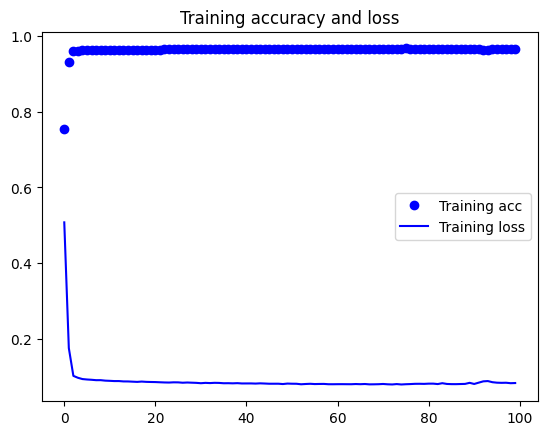

In [ ]:

import matplotlib.pyplot as plt


acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy and loss')
plt.legend()
plt.show()


# IF there are validation datasets, you would use the code here
#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()

#plt.figure()

#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()

#plt.show()

In [ ]:
pd.DataFrame(history.history).to_csv('AlphabetSoupCharity_Optimization_acc_val.csv')

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 [==============================] - 1s 3ms/step - loss: 0.7985 - accuracy: 0.5686
Loss: 0.7984992265701294, Accuracy: 0.5686297416687012


In [ ]:
model_filepath = "C:/Users/jbwil/OneDrive/Documents/GitHub/deep-learning-challenge/AlphabetSoupCharity_Optimization"
nn.save('AlphabetSoupCharity_Optimization.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
